In [68]:
# 1. Importing Libraries

import math
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
# 2. Reading the dataset

df = pd.read_csv("https://raw.githubusercontent.com/sahil-gidwani/DL/main/data/GOOGL.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [70]:
# 3. EDA & Preproccesing

# Shape of the dataset (Rows, Columns)
df.shape

(4431, 7)

In [71]:
# Dropping 'symble' column
# df.drop(columns =['symbol'] , inplace=True)

In [72]:
# Searching for missing values
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [73]:
df['Date'] = pd.to_datetime(df['Date'], utc=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19 00:00:00+00:00,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20 00:00:00+00:00,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23 00:00:00+00:00,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24 00:00:00+00:00,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25 00:00:00+00:00,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,2022-03-18 00:00:00+00:00,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21 00:00:00+00:00,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22 00:00:00+00:00,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23 00:00:00+00:00,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date       4431 non-null   datetime64[ns, UTC]
 1   Open       4431 non-null   float64            
 2   High       4431 non-null   float64            
 3   Low        4431 non-null   float64            
 4   Close      4431 non-null   float64            
 5   Adj Close  4431 non-null   float64            
 6   Volume     4431 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 242.4 KB


<Axes: xlabel='Date', ylabel='Open'>

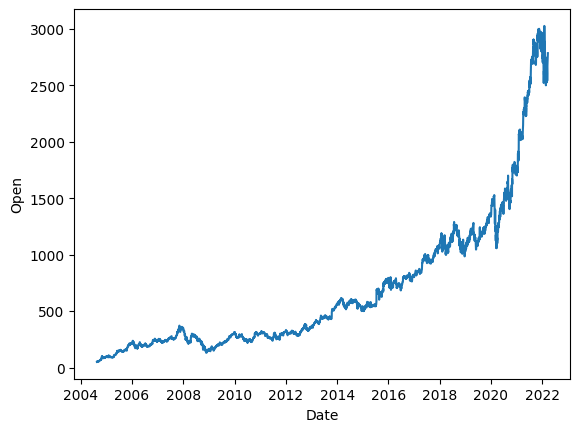

In [75]:
# 4. Visualization

sns.lineplot(data=df, x='Date', y='Open')

In [76]:
# 5. Prepering data for trainning and testing the model

DF = df.copy()
DF['Date'] = pd.to_datetime(DF['Date'])
# Set 'Date' column as index
DF = DF.set_index('Date')
DF

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19 00:00:00+00:00,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
2004-08-20 00:00:00+00:00,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2004-08-23 00:00:00+00:00,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
2004-08-24 00:00:00+00:00,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
2004-08-25 00:00:00+00:00,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...
2022-03-18 00:00:00+00:00,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
2022-03-21 00:00:00+00:00,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
2022-03-22 00:00:00+00:00,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800


In [77]:
training_set = DF[:'2020'].iloc[:,0:1].values
test_set = DF['2020':].iloc[:,0:1].values

In [78]:
# Normalization is very important in all deep learning in general. Normalization makes the properties more consistent.
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [79]:
timesteps = 60

In [80]:
"""
Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output.
For each element of training set, we have 60 previous training set elements.

"""

X_train = []
y_train = []
for i in range(timesteps,1147):
    X_train.append(training_set_scaled[i-timesteps:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [81]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [82]:
"""
We get the test set ready in a similar way as the training set.
The following has been done so first 60 entires of test set have 60 previous values
which is impossible to get unless we take the whole 'High' attribute data for processing

"""

dataset_total = pd.concat((DF['Close'][:'2020'], DF['Close']['2020':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [83]:
# Preparing X_test
X_test = []
for i in range(timesteps, len(inputs)):
    X_test.append(inputs[i-timesteps:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [84]:
# 6. Creating the model

# Define the LSTM architecture
Model = Sequential()

# First LSTM layer with Dropout regularization
Model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
Model.add(Dropout(0.2))

# Second LSTM layer with Dropout regularization
Model.add(LSTM(units=100, return_sequences=True))
Model.add(Dropout(0.2))

# Third LSTM layer with Dropout regularization
Model.add(LSTM(units=100, return_sequences=True))
Model.add(Dropout(0.2))

# Fourth LSTM layer without return_sequences since it's the last LSTM layer
Model.add(LSTM(units=100))
Model.add(Dropout(0.2))

# Fully connected layers
Model.add(Dense(units=25))
Model.add(Dense(units=1))  # Output layer

# Summary of the model architecture
Model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 60, 100)           40800     
                                                                 
 dropout_8 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_9 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_9 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_10 (LSTM)              (None, 60, 100)           80400     
                                                                 
 dropout_10 (Dropout)        (None, 60, 100)           0         
                                                                 
 lstm_11 (LSTM)              (None, 100)              

In [85]:
# Compiling the model
Model.compile(optimizer= 'adam', loss = 'mean_squared_error', metrics =['accuracy'])

In [86]:
# Epochs and Batch Size
epochs = 15
batch_size = 32

In [87]:
#from keras import callbacks
#earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 2, restore_best_weights = True)

# Fitting the model
history =  Model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)

Epoch 1/15
34/34 [==============================] - 17s 230ms/step - loss: 7.8524e-04 - accuracy: 0.0000e+00
Epoch 2/15
34/34 [==============================] - 7s 193ms/step - loss: 1.2851e-04 - accuracy: 0.0000e+00
Epoch 3/15
34/34 [==============================] - 8s 227ms/step - loss: 1.1096e-04 - accuracy: 0.0000e+00
Epoch 4/15
34/34 [==============================] - 7s 209ms/step - loss: 1.1835e-04 - accuracy: 0.0000e+00
Epoch 5/15
34/34 [==============================] - 7s 206ms/step - loss: 1.2182e-04 - accuracy: 0.0000e+00
Epoch 6/15
34/34 [==============================] - 8s 228ms/step - loss: 8.8346e-05 - accuracy: 0.0000e+00
Epoch 7/15
34/34 [==============================] - 7s 193ms/step - loss: 8.6601e-05 - accuracy: 0.0000e+00
Epoch 8/15
34/34 [==============================] - 8s 227ms/step - loss: 8.8170e-05 - accuracy: 0.0000e+00
Epoch 9/15
34/34 [==============================] - 7s 212ms/step - loss: 7.8332e-05 - accuracy: 0.0000e+00
Epoch 10/15
34/34 [========

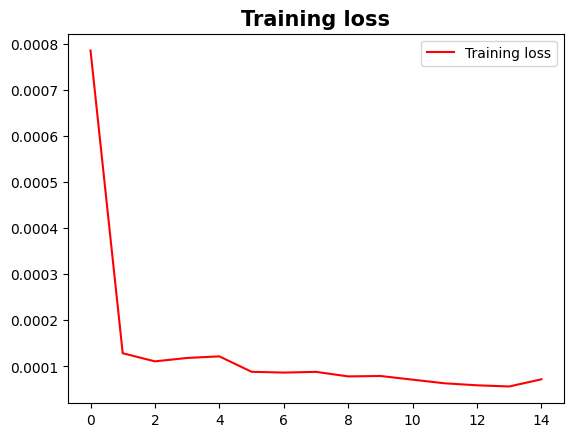

<Figure size 640x480 with 0 Axes>

In [88]:
loss = history.history['loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')

plt.title('Training loss', size=15, weight='bold')
plt.legend(loc=0)
plt.figure()

plt.show()

In [89]:
predicted_stock_price = Model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

18/18 [==============================] - 4s 66ms/step


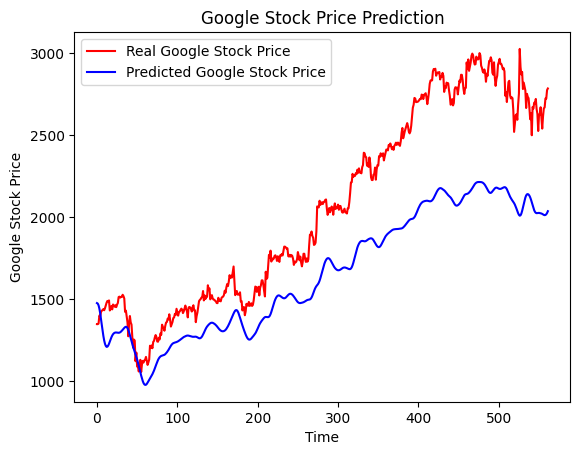

In [90]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real Google Stock Price')
    plt.plot(predicted, color='blue',label='Predicted Google Stock Price')
    plt.title('Google Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Google Stock Price')
    plt.legend()
    plt.show()

# Visualizing the results for LSTM
plot_predictions(test_set, predicted_stock_price)